In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

from warnings import filterwarnings
filterwarnings("ignore")

# Load Dataset

In [3]:
data=pd.read_csv("/kaggle/input/iris/Iris.csv")
data.shape

(150, 6)

# Data View

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.duplicated().sum()

0

# statistical analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# visiulazition

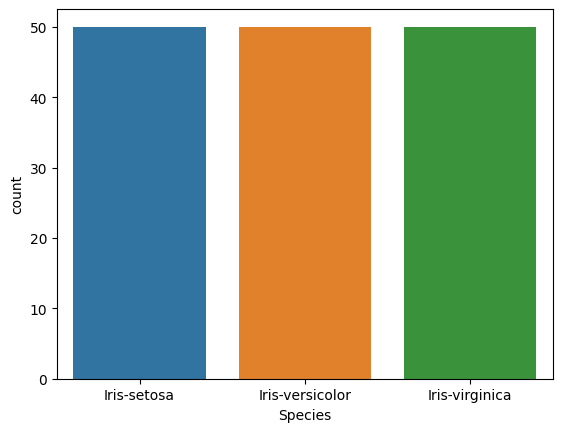

In [10]:
sns.countplot(x="Species",
              data=data)

plt.show()

In [11]:
def histplot(column):
    sns.histplot(x=column,
                 kde=True,
                 color="gray")
    
    plt.title(f"{column.name} distribution")
    plt.show()

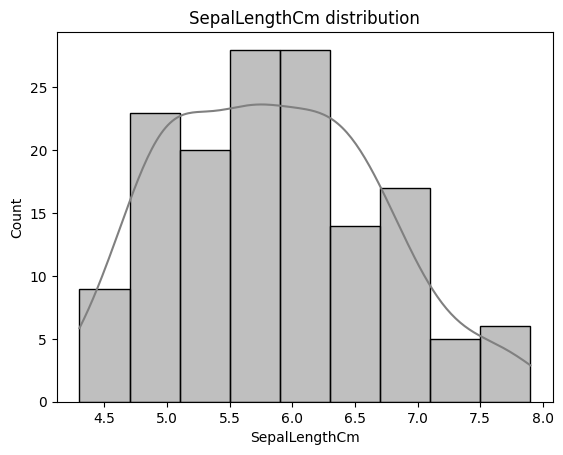

In [12]:
histplot(data["SepalLengthCm"])

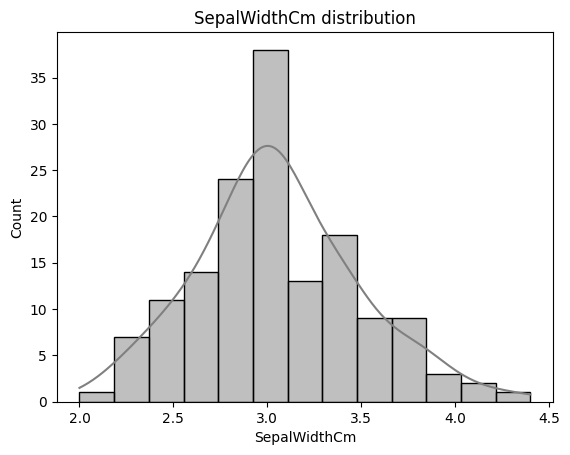

In [13]:
histplot(data["SepalWidthCm"])

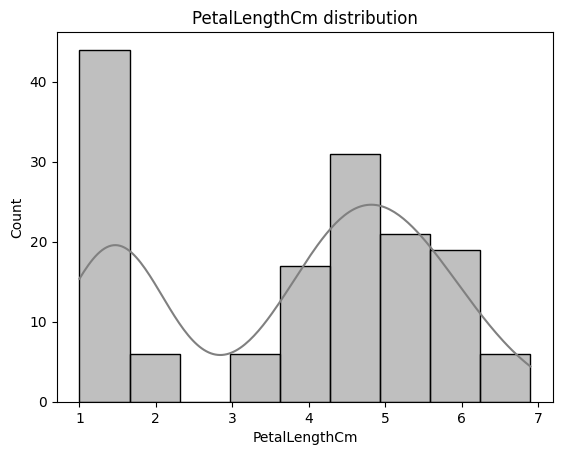

In [14]:
histplot(data["PetalLengthCm"])

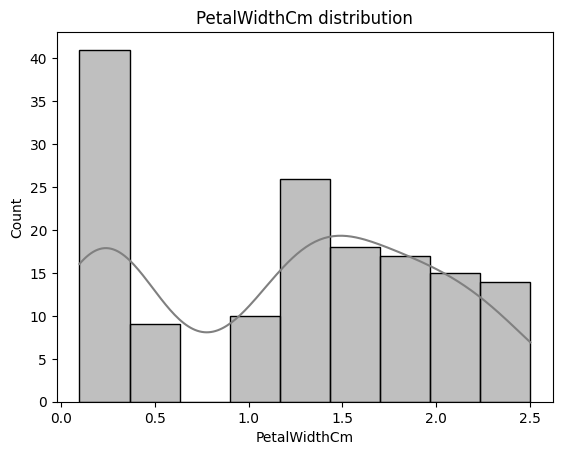

In [15]:
histplot(data["PetalWidthCm"])

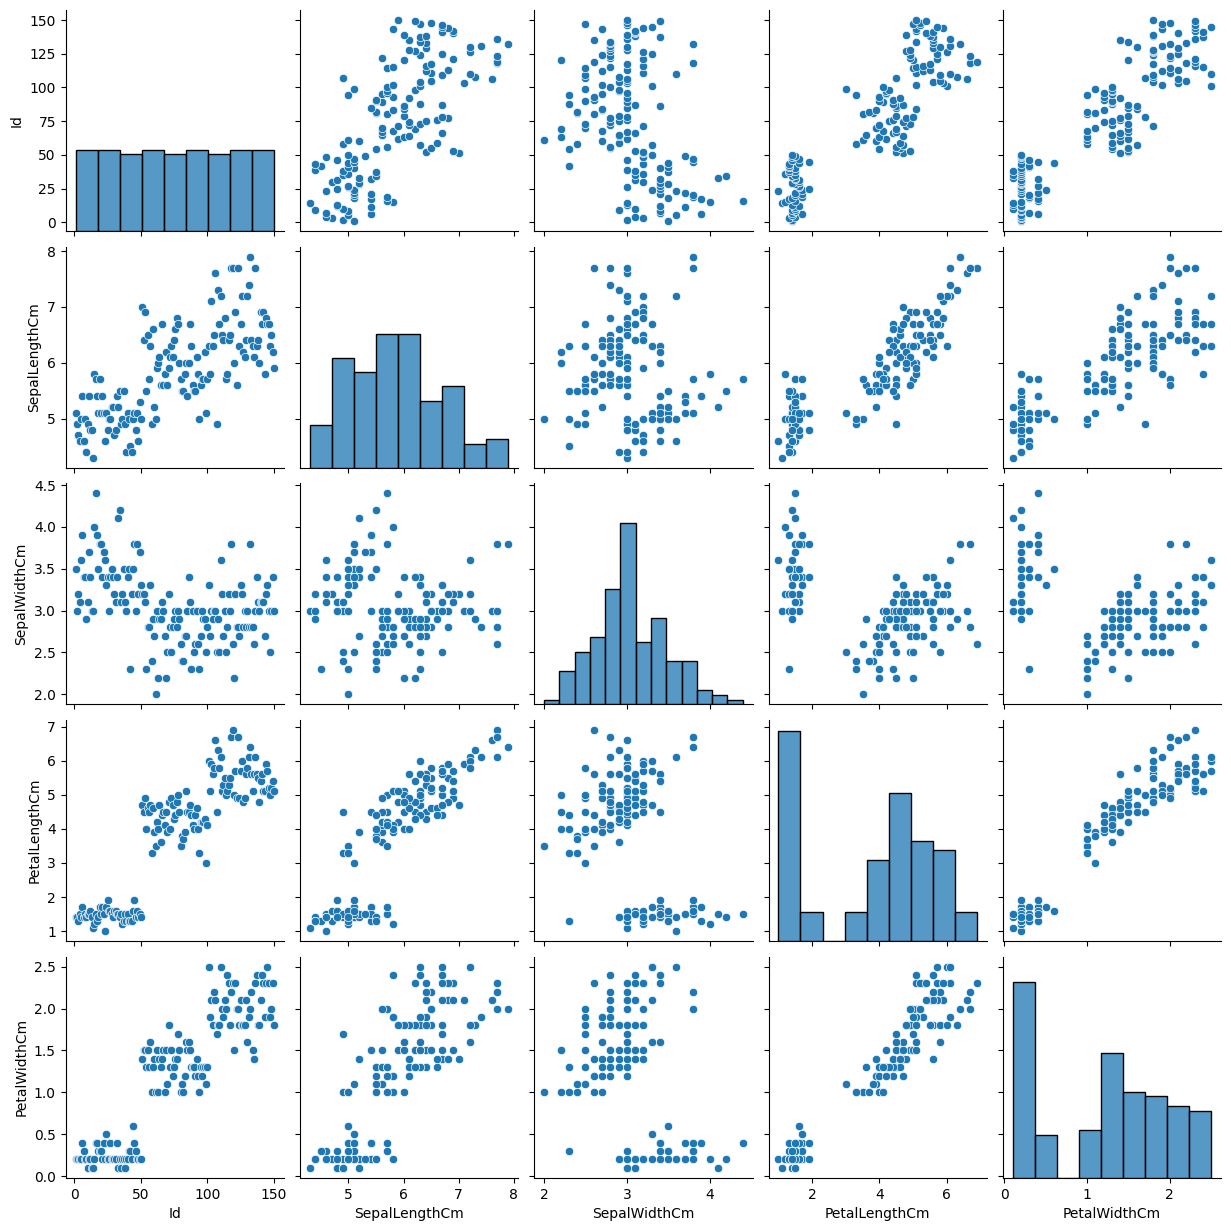

In [16]:
sns.pairplot(data)
plt.show()

# Data Encoding

In [17]:
le=LabelEncoder()
data["Species"]=le.fit_transform(data[["Species"]])

# Feature Selection

In [18]:
x=data.drop(columns=['Id','Species'],axis=1)
y=data["Species"]

# Data test

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

# Data modeling

In [ ]:
model=RandomForestClassifier(n_estimators=50,
                            random_state=42,
                            max_depth=5)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy: ",accuracy_score(y_pred,y_test))

In [ ]:
model=LogisticRegression(max_iter=1000)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy: ",accuracy_score(y_pred,y_test))

In [ ]:
model=XGBClassifier(n_estimators=50,
                            random_state=42,
                            max_depth=5)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Evaluation Metrices

In [ ]:
print("f1_score: ",f1_score(y_pred,y_test))
print("Accuracy: ",accuracy_score(y_pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

r2_score:  0.9977240958138985
mse:  0.014259259259259268
Accuracy:  99.9892749811489


# Thanks!